In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [240]:
df=pd.read_csv('sales.csv')

In [241]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [242]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [243]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [244]:
## Drop last 2 rows
# df.drop(106,axis=0,inplace=True)

In [245]:
# df.tail()

In [246]:
# df.drop(105,axis=0,inplace=True)

In [247]:
df.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [248]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [249]:

df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [250]:
# set month column as an index
df.set_index('Month',inplace=True)

In [251]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [252]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

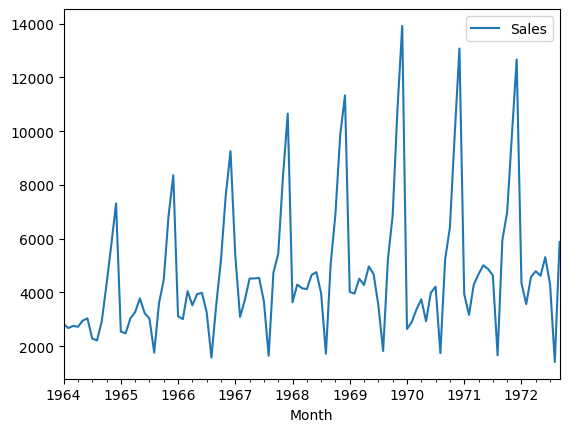

In [253]:
df.plot()

In [254]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [255]:
test_result=adfuller(df['Sales'])

In [256]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")
    

In [257]:
adfuller_test(df['Sales'])

is non-stationary 


## Differencing ( target to make stationary)

In [258]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [259]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [260]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [261]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [262]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

is stationary


<Axes: xlabel='Month'>

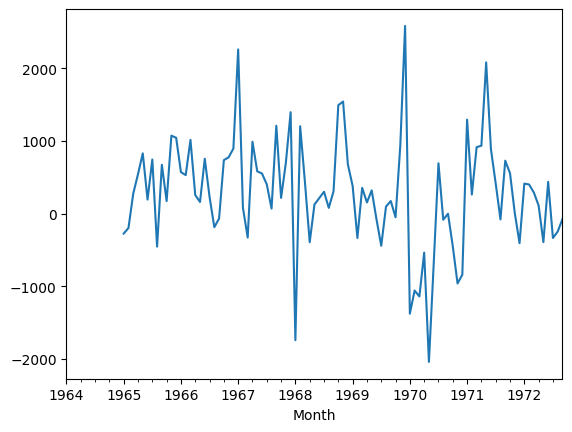

In [263]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
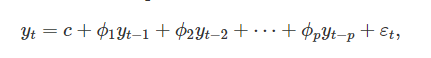

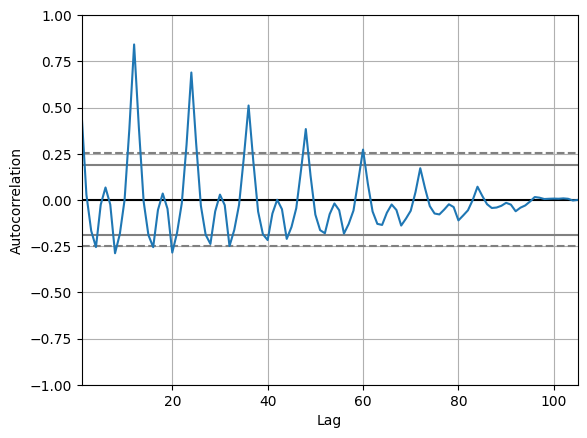

In [264]:

pd.plotting.autocorrelation_plot(df['Sales'])
plt.show()

In [265]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

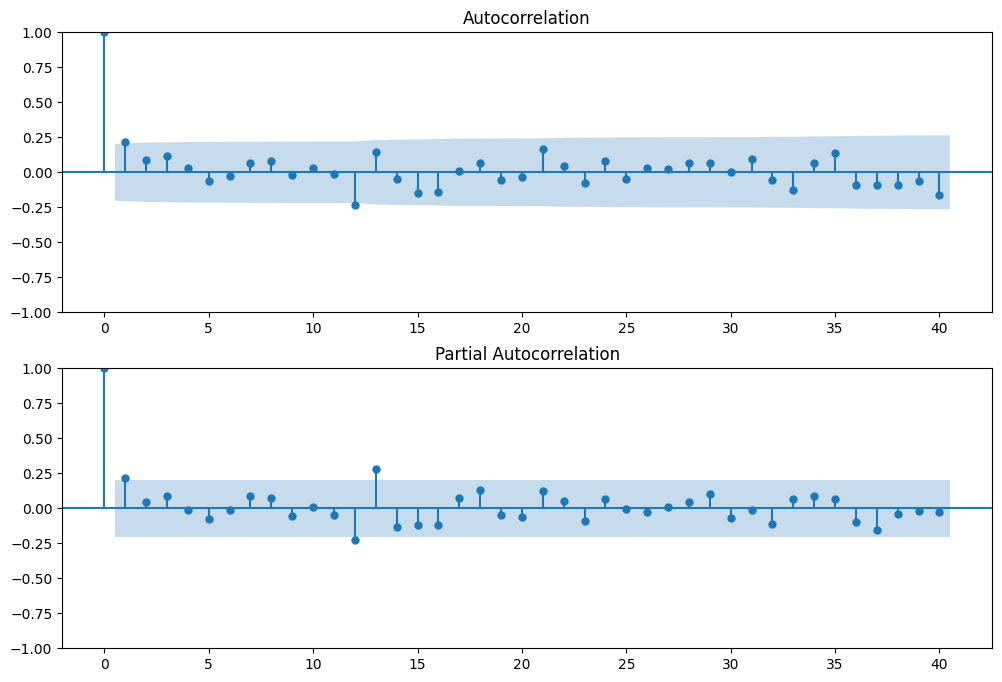

In [266]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [267]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [268]:
autoarima_model = auto_arima(df['Sales'], trace=True)
print(autoarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.416 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -966.875
Date:                Wed, 03 Jan 2024   AIC                           1935.750
Time:                        22:27:00   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                    

In [269]:
model=SARIMAX(df['Sales'],order=(0,1,0),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

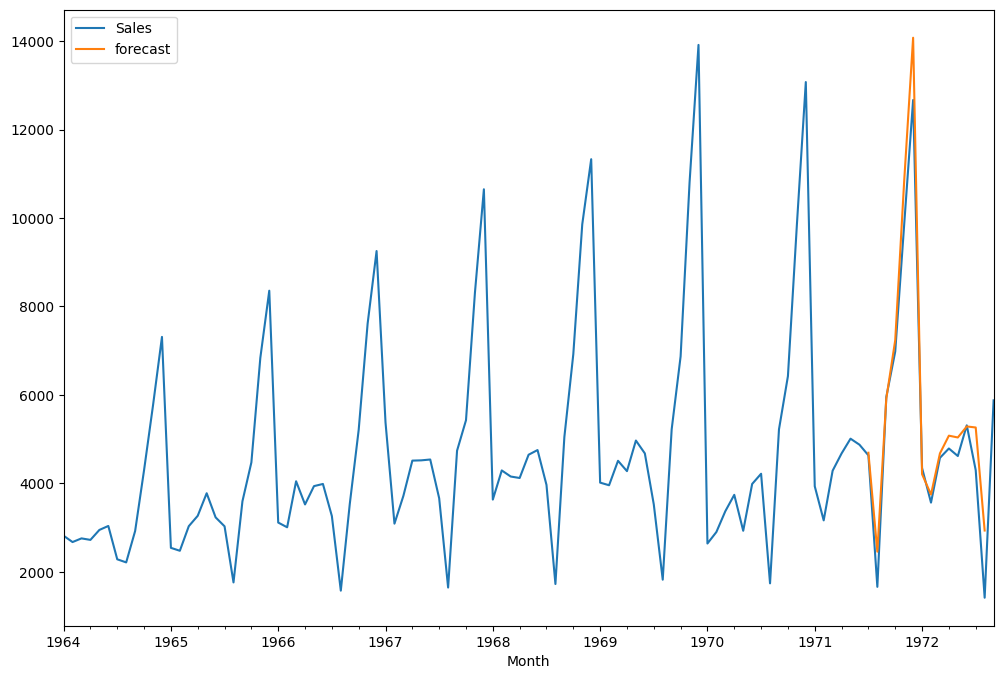

In [270]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [289]:
# from pandas.tseries.offsets import DateOffset
# future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

[Timestamp('1972-09-01 00:00:00'), Timestamp('1972-10-01 00:00:00'), Timestamp('1972-11-01 00:00:00'), Timestamp('1972-12-01 00:00:00'), Timestamp('1973-01-01 00:00:00'), Timestamp('1973-02-01 00:00:00'), Timestamp('1973-03-01 00:00:00'), Timestamp('1973-04-01 00:00:00'), Timestamp('1973-05-01 00:00:00'), Timestamp('1973-06-01 00:00:00'), Timestamp('1973-07-01 00:00:00'), Timestamp('1973-08-01 00:00:00'), Timestamp('1973-09-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1973-11-01 00:00:00'), Timestamp('1973-12-01 00:00:00'), Timestamp('1974-01-01 00:00:00'), Timestamp('1974-02-01 00:00:00'), Timestamp('1974-03-01 00:00:00'), Timestamp('1974-04-01 00:00:00'), Timestamp('1974-05-01 00:00:00'), Timestamp('1974-06-01 00:00:00'), Timestamp('1974-07-01 00:00:00'), Timestamp('1974-08-01 00:00:00')]


In [1]:
# future_datest_df=pd.DataFrame(index=future_dates[0:])


future_datest_df=pd.date_range(start='1972-09-01',end='1974-09-01' , freq='MS')

future_datest_df=pd.DataFrame(index=future_datest_df[0:])
# future_datest_df.head(20)

NameError: name 'pd' is not defined

In [308]:
# future_df=pd.concat([df,future_datest_df])

In [309]:
future_datest_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)

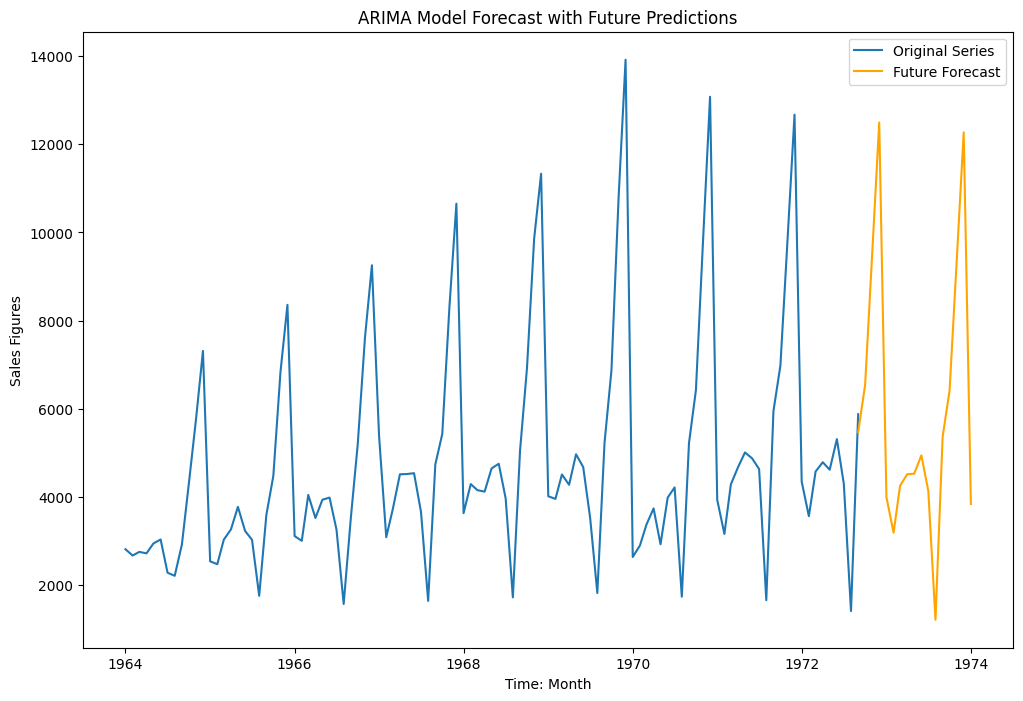

In [310]:
plt.figure(figsize=(12, 8))
plt.plot(df['Sales'], label='Original Series')
plt.plot(future_datest_df['forecast'], color='orange', label='Future Forecast')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()

In [311]:
# future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
# future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 